# Data cleaning

In [50]:
import pandas as pd

df = pd.read_csv('data/training.csv', parse_dates=['Date'])

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12     True
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
dtype: bool

## Explore the Dataset

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  30 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 1.4+ KB


In [3]:
df.describe()

,Duration,Pulse,Maxpulse,Calories
count,32.000000,32.000000,32.000000,30.000000
mean,68.437500,103.500000,128.500000,304.680000
std,70.039591,7.832933,12.998759,66.003779
min,30.000000,90.000000,101.000000,195.100000
25%,60.000000,100.000000,120.000000,250.700000
50%,60.000000,102.500000,127.500000,291.200000
75%,60.000000,106.500000,132.250000,343.975000
max,450.000000,130.000000,175.000000,479.000000


In [4]:
# delete line with duration == 450
filter_duration = df['Duration'] == 450
# df.drop( df.loc[ filter_duration, : ].index, inplace=True )
df = df.loc[ ~filter_duration, : ]

In [5]:
# prazdne hodnoty nahradim predchadzajucimi/nasledujucimi
df['Date'].bfill(inplace=True)  #(method='ffill')

/tmp/ipykernel_61371/3065084300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'].bfill(inplace=True)  #(method='ffill')


In [6]:
# odstran cely riadok, ktory v stlpci calories ma prazdnu hodnotu
df.dropna(subset=['Calories'], inplace=True)

/tmp/ipykernel_61371/121940706.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Calories'], inplace=True)


In [7]:
# preformatovat cas
# df.info()
dt = df.at[26, 'Date']
df.at[26, 'Date'] = f'\'{dt[:4]}/{dt[4:6]}/{dt[6:]}\''

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_61371/2394721818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 0 to 31
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Duration  29 non-null     int64         
 1   Date      29 non-null     datetime64[ns]
 2   Pulse     29 non-null     int64         
 3   Maxpulse  29 non-null     int64         
 4   Calories  29 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 2.4 KB


In [10]:
df['Date'] > '2020/12/20'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
19    False
20    False
21     True
22     True
23     True
24     True
25     True
26     True
27     True
29     True
30     True
31     True
Name: Date, dtype: bool

In [12]:
df.describe()
# df['Date'].str.match('\'\\d{4}/\\d{2}/\\d{2}\'')
# df.loc[ filter_re ]

,Duration,Date,Pulse,Maxpulse,Calories
count,29.000000,29,29.000000,29.000000,29.000000
mean,56.379310,2020-12-15 16:33:06.206896640,103.965517,128.758621,306.451724
min,30.000000,2020-12-01 00:00:00,92.000000,101.000000,195.100000
25%,60.000000,2020-12-09 00:00:00,100.000000,120.000000,250.700000
50%,60.000000,2020-12-15 00:00:00,102.000000,127.000000,300.000000
75%,60.000000,2020-12-23 00:00:00,108.000000,132.000000,345.300000
max,60.000000,2020-12-31 00:00:00,130.000000,175.000000,479.000000
std,7.664453,NaN,7.821594,13.257492,66.442116


<Axes: xlabel='Date'>

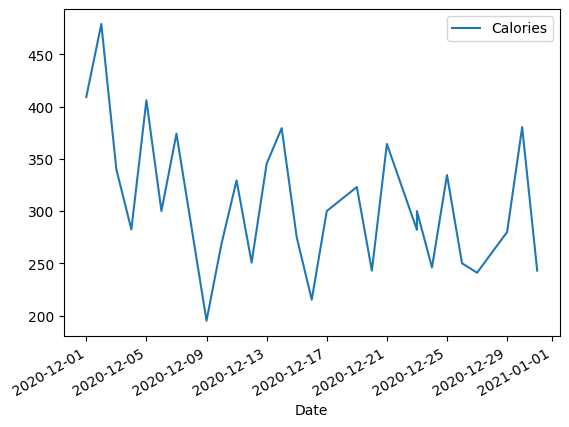

In [14]:
df.plot(x='Date', y='Calories')